<a href="https://colab.research.google.com/github/JavierMarin24/ADA-Informes/blob/main/Informe6%20Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de Optimización**

Los problemas de optimización son de los más comunes que se pueden encontrar en cualquier tipo de trabajo. Estos buscan la máxima eficiencia para la resolución de problemas, en otras palabras, maximizan o minimizan el valor de una función.

El problema planteado en este informe es el de buscar el **estaístico de orden** k-ésimo que contiene el **k-ésimo** elemento menor del donjunto de datos.

A continuación se presentan la entrada y salida esperada para este problema:

**Entrada**: Arreglo de $n$ números diferentes y un índice $k$.

**Salida**: Elemento mayor a $k-1$ elementos del arreglo.

El elemento $x$ se conoce como **estadístico de orden $k$-ésimo** para el conjunto $A$.
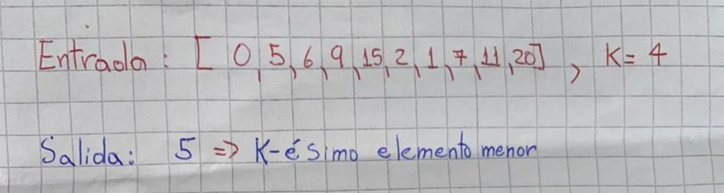



# **2. Descripción del Algoritmo**

### **2.1 ¿Cómo funciona?**


A grandes rasgos, el algoritmo Select posee los siguientes pasos: 

1. Comprueba que el elemento k-ésimo se encuentre en el arreglo.

2. Utiliza **Pivot-Selection** para escoger el pivote que le entregará a **Partition**.

3. Si $k-ésimo elemento buscado == Pivote retornado por Partition$ se retorna el elemento k-ésimo, de no ser iguales se elige una de las dos particiones:

* Si $k < pivote$ se escoge la partición izquierda y se llama de forma recursiva a $Select$.

* Si $k > pivote$ se escoge la partición derecha y se llama de forma recursiva a $Select$.


### **2.2 Funciones**

El algoritmo **Select** se puede dividir en dos funciones principales las cuales se describen a continuación:

### **2.2.1 Pivot Selection**

Encuentra el **pivote** para utilizar en **Partition**

1. Recibe un arreglo el cual divide en $n/5$ sub-arreglos.
2. Cada sub-arreglo se ordena mediante **Insertion Sort**.
3. Se obtiene la mediana de cada sub-arreglo y posteriormente se obtiene la mediana entre las medianas.
4. EL valor obtenido en el paso 3 se retorna y se entrega como **parametro** a la función **Partition**.

### **2.2.2 Partition**
1. Recibe el pivote obtenido de Pivot Selection.
2. Particiona el arreglo de tal forma que quedan 2 sub-arreglos donde uno debe poseer todos los elementos menores al pivote y el otro todos los elementos mayores al pivote.
3. Retorna la posición donde queda el pivote.

### **2.3 Código**

In [120]:
def insertionSort(arreglo,cont): 
  largoArreglo = len(arreglo)
  cantidadIntercambiosFinal = 0
  for i in range(1,largoArreglo):   
    comparador = arreglo[i] 
    posicionComparador=i
    cont[0]= cont[0] +1
    for j in range(1,i+1):     
      if( comparador < arreglo[i-j]): 
          arreglo[posicionComparador] = arreglo[i-j] 
          posicionComparador = posicionComparador-1
          arreglo[posicionComparador] = comparador 
          cont[0]= cont[0] +1
      else :
        break
  return arreglo

def partition(arr, pivot,cont):
  i = 1
  cont[0]= cont[0] +1
  if pivot !=0:
    arr[0],arr[pivot] = arr[pivot],arr[0]
  for j in range(1,len(arr)):
    cont[0]= cont[0] +1
    if arr[j] < arr[0]:
        arr[j],arr[i] = arr[i],arr[j]
        i += 1
  arr[0],arr[i-1] = arr[i-1],arr[0]
  return i-1

def pivotSelection(array,cont, verbose):
  cont[0]= cont[0] +1
  #calculo cuantos subarrays necesito
  listaMedianas = []
  arrayAux = []
  n=0
  largoArray = len(array)
  contSubArray = largoArray // 5 + 1
  if(largoArray % 5 == 0):
    contSubArray = largoArray // 5 
    if(verbose == True):
      print("El arreglo se divide en ",contSubArray," sub-arreglos")
      print("\n")
    for i in range(contSubArray):
    #creacion de los sub array
      arrayAux = array[n:n+5]
      if(verbose == True):
        print("Sub arreglo número", i+1,": ", arrayAux)
        print("\n")
    #insertion Sort para ordenarlos
    
      arrayAux = insertionSort(arrayAux,cont)
     
      mediana = len(arrayAux) // 2
      if(verbose == True):
        print("Ordenado queda de la forma: ", arrayAux," Y su mediana es ", arrayAux[mediana])
        print("\n")

    #insertar la mediana en el arreglo de medianas
      listaMedianas.append(arrayAux[mediana])
      n+=5
  else:
    if(verbose == True):
      print("El arreglo se divide en ",contSubArray," sub-arreglos")
      print("\n")
    for i in range(contSubArray):
      #creacion de los sub array
        arrayAux = array[n:n+5]
        if(verbose == True):
          print("Sub arreglo número", i+1,": ", arrayAux)
          print("\n")
        
      #insertion Sort para ordenarlos
        arrayAux = insertionSort(arrayAux, cont)
        mediana = len(arrayAux) // 2
        if(verbose == True):
          print("Ordenado queda de la forma: ", arrayAux," Y su mediana es ", arrayAux[mediana])
          print("\n")
      #insertar la mediana en el arreglo de medianas
        listaMedianas.append(arrayAux[mediana])
        n+=5

  if(verbose == True):
    print("La lista de medianas queda de la forma: ", listaMedianas)
    print("\n")
  #caso base
  if(len(listaMedianas)==1):
    return listaMedianas[0]
  if(len(array)==1):
    return array[0]
  
  return pivotSelection(listaMedianas,cont, verbose)

def select(array, j,cont, verbose):
  
  cont[0]= cont[0] +1
  if(len(array)==1):
    return array[0]
  if(verbose == True):
    print("Arreglo a evaluar: ", array)
    print("\n")
  pivote = pivotSelection(array,cont, verbose)
  pivote = array.index(pivote) 
  pivotePartition = partition(array, pivote,cont)
  k=j-1
  if(pivotePartition == k):
    if(verbose == True):
      print("pivotePartition == k, se retorna el k-ésimo menor elemento:", array[pivotePartition])
      print("\n")
    return array[pivotePartition]
  if(pivotePartition < k):
    if(verbose == True):
      print("pivotePartition < k, nos quedamos con la parte derecha:", array[pivotePartition+1:])
      print("\n")
    cont[0]= cont[0] +1
    return select(array[pivotePartition+1:],j-pivotePartition-1,cont,verbose)
  else:
    if(verbose == True):
      print("pivotePartition > k, nos quedamos con la parte izquierda:", array[:pivotePartition])
      print("\n")
    cont[0]= cont[0] +1
    return select(array[:pivotePartition], j, cont,verbose)
 

### **2.4 Implementación Verbose = True**

In [122]:
array = [2,5,3,11,25,4,0,15,1,40,9]
cont = [0]
print("Arreglo de entrada", array)
result = select(array,10, cont, True)
print("El k-ésimo elemento buscado es :",result)
print("Número de comparaciones", cont[0])

Arreglo de entrada [2, 5, 3, 11, 25, 4, 0, 15, 1, 40, 9]
Arreglo a evaluar:  [2, 5, 3, 11, 25, 4, 0, 15, 1, 40, 9]


El arreglo se divide en  3  sub-arreglos


Sub arreglo número 1 :  [2, 5, 3, 11, 25]


Ordenado queda de la forma:  [2, 3, 5, 11, 25]  Y su mediana es  5


Sub arreglo número 2 :  [4, 0, 15, 1, 40]


Ordenado queda de la forma:  [0, 1, 4, 15, 40]  Y su mediana es  4


Sub arreglo número 3 :  [9]


Ordenado queda de la forma:  [9]  Y su mediana es  9


La lista de medianas queda de la forma:  [5, 4, 9]


El arreglo se divide en  1  sub-arreglos


Sub arreglo número 1 :  [5, 4, 9]


Ordenado queda de la forma:  [4, 5, 9]  Y su mediana es  5


La lista de medianas queda de la forma:  [5]


pivotePartition < k, nos quedamos con la parte derecha: [25, 15, 11, 40, 9]


Arreglo a evaluar:  [25, 15, 11, 40, 9]


El arreglo se divide en  1  sub-arreglos


Sub arreglo número 1 :  [25, 15, 11, 40, 9]


Ordenado queda de la forma:  [9, 11, 15, 25, 40]  Y su mediana es  15


La lista

# **3. Tiempo de Ejecución**

###**3.1 Teorema**
El tiempo de ejecución del algoritmo Select es de orden $O(n)$.

### **3.2 Prueba del Teorema**

Select se divide en 3 funciones principales:
  Insertion Sort
  Pivot Selection
  Partition
Si se analiza el tiempo de ejecución de cada una de ellas se obtiene lo siguiente:

1. Insertion Sort: para la implementación del algoritmo select se utiliza este algoritmo de ordenamiento para arreglo cuyo máximo largo es 5 por lo que no se considera un tiempo del orden $O(n^2)$ como lo es en su caso promedio sino más bien se considera un tiempo $O(n)$ en su ejecución.
2. Partition: este algoritmo cumple la misma función que dice su nombre "partir" el arreglo por lo que en cada llamado, esta es recorrida de forma lineal obteniendo así un tiempo de orden $O(n)$.
3. Pivot Selection: esta función se encarga de escoger el pivote a utilizar por la función partition. En su implementación, se crean $n/5$ sub-arreglos donde contienen 5 elementos cada uno de ellos, se calcula la mediana de cada uno de ellos y posteriormente la mediana de todas las medianas obteniendo así el pivote buscado. Para el tiempo de ejecución se tomará el peor caso de pivote donde este último es mayor a $3/5$ de los elementos de cada sub arreglo por lo que el pivote dividiría al arreglo principal en una parte con 3n/10 elementos y otra con 7n/10 elementos.

De acuerdo a lo anterior se obtiene la siguiente función de recurrencia:
$$
T(n) \leq O(n) + T(n/5) + T(7n/10)
$$

Como se menciona en el punto 3.1, el algoritmo Select posee tiempo $O(n)$ por lo que se trabajará la función de recurrencia mediante el método de sustitución para llegar al resultado esperado.


El algoritmo select se apoya en múltiples subrutinas tales como InsertionSort, Partition  y PivotSelection. 

El algoritmo InsertionSort es utilizado exclusivamente en subarreglos de a lo sumo 5 elementos. Se sabe que InsertionSort realiza $n^2$ comparaciones. Es posible concluir que se realizarán a lo más 25 comparaciones. Por lo que la subrutina InsertionSort está acotada por un valor constante, vale decir $O(1)$.

Para cada llamada al algoritmo Partition recorremos el arreglo de manera lineal. Por lo que su complejidad es $O(n)$.

Pivot Selection es una función recursiva. Se itera por los números del arreglo para añadirlos a los subarreglos. Esto tiene una complejidad lineal $O(n)$. Esta subrutina se puede encontrar en otras implementaciones como 
"chunked".

Posteriormente se obtiene recursivamente la mediana de medianas. Concretamente el arreglo de medianas posee $n/5$ elementos. Por lo que el tiempo de ejecución de la llamada recursiva será denotado como $T(n/5)$.

Una vez realizada la partición, en el peor caso se presentan dos posibles tiempos. El primero es la recursión a la partición izquierda, cuyo tiempo sería $T(3n/10)$. El segundo es el de la recursión a la partición derecha y el que será utilizado para analizar el tiempo de ejecución, el tiempo de esta mitad sería $T(7n/10)$.

De lo anterior se deduce que la función de recurrencia $T(n)$ para el algoritmo select está definida por

$$
T(n) \leq O(n) + T(n/5) + T(7n/10)
$$

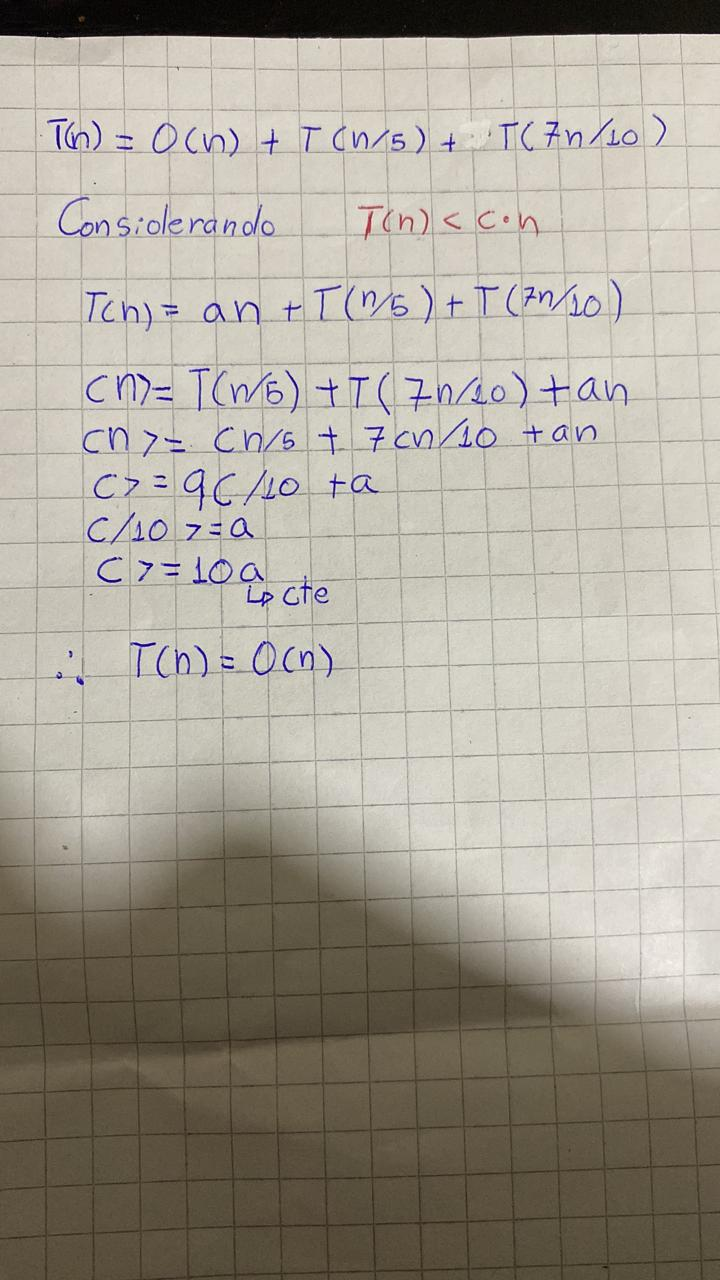

# **4. Correctitud**

Utilizando **inducción matemática** para probar la correctitud se obtiene lo siguiente:

### **4.1 Correctitud Select**

Considerando $n$ como el tamaño del arreglo de entrada:

Caso Base $n=1$ : Si el arreglo de entrada posee 1 solo elemento, este es retornado y corresponde al k-ésimo elemento menor.

Caso General $n>1$: Select es correcto para problemas de tamaño $m<n$. Se le entrega un arreglo de largo n a la función pivotSelection, esta escoge un pivote el cual se entrega a partition donde divide al arreglo principal en 2 sub-arreglos donde uno de ellos contendrá al k-ésimo elemento buscado por lo que se asume que para problemas de tamaño m el algoritmo es correcto.

### **4.2 Correctitud Insertion Sort**

Otra forma de explicar la correctitud del algoritmo, es probando la de la función que se encarga de ordenar los buckets, a continuación se prueba que este algoritmo es correcto.

El algoritmo Insertion Sort genera un arreglo o lista con los mismos elementos del arreglo de entrada, ordenados de menor a mayor.

Para probar el teorema, se utilizará la siguiente propiedad invariante de bucle:

Al comienzo de cada iteración i del bucle más grande,los primeros i-1 elementos del arreglo estarán ordenados de menor a mayor

Inicialización: Al inicio de la primera iteración (i=1), los primeros i-1 = 0 elementos se encuentran ordenados de menor a mayor.

Mantención: En inicio de cada iteración i, el arreglo tendrá los primeros i-1 elementos ordenados de menor a mayor. Durante cada iteración, se comparará el elemento de la posición arreglo[i] con las casillas a su izquierda, intercambiandose entre si hasta que los primeros i elementos queden ordenados de menor a mayor.

# **5. Experimentos**

### **5.1 Select v/s Randomized Select**

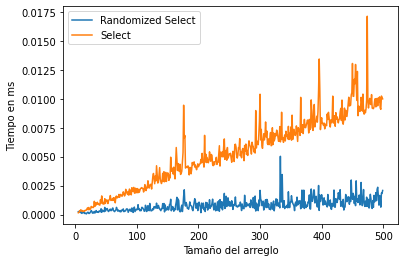

In [83]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np
import random
def Partition(a, p, r):

    x = a[r]
    i = p - 1
    for j in range(p, r):
        if a[j] <= x:
            i = i + 1
            
            a[i], a[j] = a[j], a[i]

    a[i+1], a[r] = a[r], a[i+1]

    return i + 1

def RandomizedPartition(a, p, r):
    
    i = np.random.randint(p, r)
    a[i], a[p] = a[p], a[i]
    return Partition(a, p, r)

def Randomizedselect(a, p, r, i):
    if p == r:
        return a[p]
    q = RandomizedPartition(a, p, r)
    
    k = q - p +1
    if i == k:
        return a[q]
    elif i < k:
        return Randomizedselect(a, p, q - 1, i)
    else:
        return Randomizedselect(a, q + 1, r, i - k)
x=[]; y=[]
y1=[]

for n in range(5,500):
  contComparaciones = 0
  a = random.sample(range(1, 1000), n)

  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import Randomizedselect", stmt=f"Randomizedselect({a},{0},{n-1},{2})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import select", stmt=f"select({a},{2})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Randomized Select", "Select"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **5.1.1 Análisis de Resultados**

Se concluye del gráfico que el tiempo de ejecución del **randomized select** es mucho **menor** al de **select**, esto debido a que select divide al arreglo en $n/5$ sub-arreglos en cada llamado de la función **pivotSelection** y ordena cada uno de ellos con **Insertion Sort** por lo cual estas dos acciones aumentan considerablemente el tiempo de ejecución mientras que randomized escoge un **pivote random** y se lo entrega directamente a **partition** sin hacer esos pasos extra para buscar un mejor pivote como lo hace select.

### **5.2 Mejor Caso v/s Pero Caso**

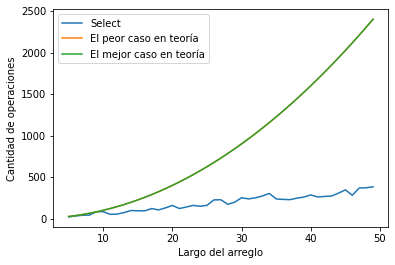

In [101]:

from itertools import count
import matplotlib.pyplot as plt 
import math 
import random

x=[n for n in range(5,50)] 
y1=[(n*n) for n in range(5,50)] # peor caso
y2=[(n*n) for n in range(5,50)] # mejor caso
y=[]; 

for n in range(5,50):
  a = random.sample(range(1, 100), n)
  cont = [0]
  k = 3
  select(a, k, cont)
  y.append(cont[0])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "El peor caso en teoría", "El mejor caso en teoría"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Cantidad de operaciones')
plt.show()

### **5.2.1 Análisis de Resultados**

Del gráfico se deduce que el tiempo de ejecución de el mejor y peor caso teórico es el mismo ya que ambas curvas se superponen, siendo ambos casos de orden $O(n)$ lo cual es muy interesante. El algoritmo select siempre dividirá en 2 partes con el partition el sub arreglo por lo que los resultados concuerdan con ese acontecimiento.